# Уменьшение количества цветов изображения

In [56]:
from skimage.io import imread
import pandas as pd
import skimage
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib
import pylab
%matplotlib inline

In [26]:
img = imread('data/parrots.jpg')
img = skimage.img_as_float(image)

In [24]:
pixels = pd.DataFrame(np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2])), columns=['R', 'G', 'B'])
pixels.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


In [29]:
X = pixels.loc[:, 'R':'B']

clf = KMeans(init='k-means++', random_state=241)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

In [30]:
pixels['Cluster'] = clf.predict(X)

In [45]:
means = pixels.groupby('Cluster').mean().values
mean_pixels = [means[x] for x in pixels['Cluster']]
# mean_pixels
mean_image = np.reshape(mean_pixels, (img.shape[0],img.shape[1],img.shape[2]))

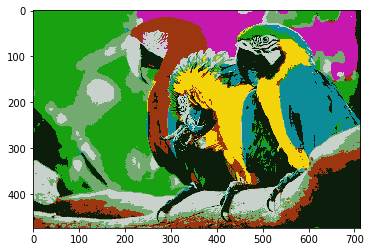

In [49]:
pylab.imshow(mean_image)

In [51]:
medians = pixels.groupby('Cluster').median().values
median_pixels = [medians[x] for x in pixels['Cluster']]
# mean_pixels
median_image = np.reshape(median_pixels, (img.shape[0],img.shape[1],img.shape[2]))

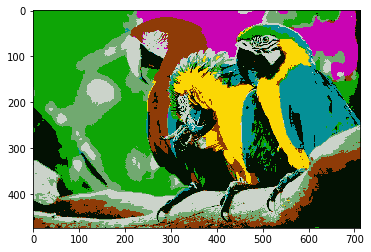

In [52]:
pylab.imshow(median_image)

In [67]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100

    return 20 * math.log10(1 / math.sqrt(mse))

In [68]:
psnr_mean = psnr(img, mean_image)
psnr_median = psnr(img, median_image)
print(psnr_mean, psnr_median)

20.127588746514583 19.84128407389954


In [69]:
k = 0
for n in range (1,21):
    clf = KMeans(n_clusters = n,init='k-means++', random_state=241)
    clf.fit(X)
    pixels['Cluster'] = clf.predict(X)

    means = pixels.groupby('Cluster').mean().values
    mean_pixels = [means[x] for x in pixels['Cluster']]
    mean_image = np.reshape(mean_pixels, (img.shape[0],img.shape[1],img.shape[2]))

    medians = pixels.groupby('Cluster').median().values
    median_pixels = [medians[x] for x in pixels['Cluster']]
    median_image = np.reshape(median_pixels, (img.shape[0],img.shape[1],img.shape[2]))
    
    psnr_mean = psnr(img, mean_image)
    psnr_median = psnr(img, median_image)
    
    if psnr_median > 20 or psnr_mean > 20:
        k = n
        break

In [70]:
k

11